In [1]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.datasets import load_iris
from sklearn import tree
from graphviz import render
from sklearn.tree import export_graphviz
from IPython.display import Image

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus
import graphviz
import pydotplus as pdot

In [3]:
clf = tree.DecisionTreeClassifier()

In [4]:
clf1 = svm.SVC()

In [5]:
clf2 = GaussianNB()

In [6]:
clf3 = neighbors.KNeighborsClassifier()

In [7]:
enc = LabelEncoder()

In [9]:
pinkFlam = pd.read_csv ('C:/Users/benbr/Desktop/DonnéesCSV/combined-data.csv.csv')
pinkFlam = pinkFlam.rename(columns=lambda x: x.strip())

In [10]:
label_encoder = enc.fit(pinkFlam['platformType'])

In [11]:
print ("Categorical classes:", label_encoder.classes_)

Categorical classes: ['android' 'iphone' 'linux' 'mac' 'windows']


In [12]:
integer_classes = label_encoder.transform(label_encoder.classes_)

In [13]:
print ("Integer classes:", integer_classes)

Integer classes: [0 1 2 3 4]


In [14]:
t = label_encoder.transform(pinkFlam['platformType'])

In [15]:
pinkFlam['EncPlatformType'] = t

In [16]:
X = pinkFlam[['teamLevel' ,'count_gameclicks' , 'count_hits','count_buyId' , 'EncPlatformType']][0:846]

In [17]:
pinkFlam.replace("", np.nan, inplace=True)

In [18]:
pinkFlam = pinkFlam[np.isfinite(pinkFlam['count_buyId'])]

In [20]:
pinkFlam['user_category'] = np.where(pinkFlam['avg_price']> 5, 'Depensiers ', 'Economes')

In [21]:
pinkFlam.head()

userId  userSessionId  teamLevel platformType  count_gameclicks  \
4      937           5652          1      android                39   
11    1623           5659          1       iphone               129   
13      83           5661          1      android               102   
17     121           5665          1      android                39   
18     462           5666          1      android                90   

    count_hits  count_buyId  avg_price  EncPlatformType user_category  
4            0          1.0        1.0                0      Economes  
11           9          1.0       10.0                1   Depensiers   
13          14          1.0        5.0                0      Economes  
17           4          1.0        3.0                0      Economes  
18          10          1.0        3.0                0      Economes

In [22]:
Y = pinkFlam['user_category'][0:846]

In [23]:
X_test = pinkFlam[['teamLevel' ,'count_gameclicks' , 'count_hits','count_buyId' , 'EncPlatformType']][846:1411]

In [24]:
Y_test = pinkFlam['user_category'][846:1411]

In [25]:
np.nan_to_num(X)

array([[ 1., 69.,  8.,  0.,  0.],
       [ 1., 31.,  5.,  0.,  1.],
       [ 1., 26.,  2.,  0.,  1.],
       ...,
       [ 3., 40.,  3.,  2.,  1.],
       [ 3., 42.,  5.,  0.,  1.],
       [ 3., 32.,  4.,  0.,  0.]])

In [26]:
X_test.fillna(X_test.mean())

teamLevel  count_gameclicks  count_hits  count_buyId  EncPlatformType
2978          6               110          15          2.0                2
2981          6               235          38          2.0                1
2984          6               235          26          3.0                0
2998          6               119          13          3.0                4
2999          6               116          11          2.0                1
3002          6               109          10          3.0                3
3005          6                98          19          1.0                0
3006          6               108           9          3.0                0
3009          6               111           9          1.0                0
3010          6               100          17          2.0                1
3011          6               109          16          1.0                4
3012          6                76          16          1.0                1
3018          6               152          28          1.0                1
3022          6               167          24          1.0                0
3023          6               147          21          2.0                1
3032          6               124          26          4.0                1
3038          6               304          38          3.0                1
3043          6               147          18          2.0                0
3047          6                44           6          1.0                1
3048          6               140          11          1.0                1
3049          6               140          12          1.0                0
3051          6               185          28          1.0                1
3052          6               218          29          1.0                1
3053          6               180          30          1.0                0
3054          6               183          17          3.0                1
3055          6               188          17          2.0                4
3057          6               200          29          2.0                1
3059          6                79           9          1.0                0
3066          6                88          14          3.0                1
3068          6                79          11          1.0                0
...         ...               ...         ...          ...              ...
4497          6               164          23          4.0                3
4498          6               181          15          2.0                0
4500          6               187          22          3.0                4
4501          6               171          25          1.0                0
4503          5                74          10          1.0                1
4505          3               353          33          1.0                2
4507          3               331          36          1.0                1
4508          7                76           2          1.0                1
4516          3               243          24          1.0                0
4519          3               233          29          2.0                3
4529          7               115          16          2.0                1
4531          2               706          75          2.0                4
4535          5               335          30          1.0                0
4542          4               316          34          2.0                4
4546          6               115          14          1.0                4
4547          7                 6           2          1.0                1
4550          6               148          14          1.0                4
4558          6                78           8          2.0                2
4568          4               215          24          2.0                0
4569          4               482          56          1.0                0
4572          4               384          42         

In [27]:
np.nan_to_num(Y)

array(['Economes', 'Depensiers ', 'Economes', 'Economes', 'Economes',
       'Depensiers ', 'Economes', 'Economes', 'Economes', 'Depensiers ',
       'Economes', 'Depensiers ', 'Economes', 'Economes', 'Depensiers ',
       'Depensiers ', 'Economes', 'Depensiers ', 'Economes',
       'Depensiers ', 'Depensiers ', 'Depensiers ', 'Economes',
       'Depensiers ', 'Economes', 'Depensiers ', 'Economes',
       'Depensiers ', 'Depensiers ', 'Depensiers ', 'Depensiers ',
       'Depensiers ', 'Depensiers ', 'Depensiers ', 'Economes',
       'Economes', 'Depensiers ', 'Economes', 'Depensiers ',
       'Depensiers ', 'Economes', 'Economes', 'Economes', 'Economes',
       'Depensiers ', 'Economes', 'Depensiers ', 'Economes',
       'Depensiers ', 'Economes', 'Economes', 'Economes', 'Depensiers ',
       'Economes', 'Economes', 'Economes', 'Economes', 'Economes',
       'Economes', 'Depensiers ', 'Depensiers ', 'Depensiers ',
       'Economes', 'Economes', 'Economes', 'Economes', 'Depensiers ',
 

In [28]:
clf = clf.fit(np.nan_to_num(X) , np.nan_to_num(Y))

In [29]:
clf1 = clf1.fit(np.nan_to_num(X) , np.nan_to_num(Y))

In [30]:
clf2 = clf2.fit(np.nan_to_num(X) , np.nan_to_num(Y))

In [31]:
clf3 = clf3.fit(np.nan_to_num(X) , np.nan_to_num(Y))

In [32]:
X_test = pinkFlam[['teamLevel' ,'count_gameclicks' , 'count_hits','count_buyId' , 'EncPlatformType']][846:1411]

In [33]:
Y_test = pinkFlam['user_category'][846:1411]

In [34]:
Y_prediction  = clf.predict(X_test)

In [35]:
Y_prediction1 = clf1.predict(X_test)

In [36]:
Y_prediction2 = clf2.predict(X_test)

In [37]:
Y_prediction3 = clf3.predict(X_test)

In [38]:
print("Prévision pour Naive Bayes : ",Y_prediction2)

Prévision pour Naive Bayes :  ['Depensiers ' 'Depensiers ' 'Depensiers ' 'Depensiers ' 'Economes'
 'Depensiers ' 'Economes' 'Depensiers ' 'Economes' 'Depensiers '
 'Economes' 'Economes' 'Depensiers ' 'Economes' 'Depensiers '
 'Depensiers ' 'Depensiers ' 'Depensiers ' 'Economes' 'Economes'
 'Economes' 'Depensiers ' 'Depensiers ' 'Depensiers ' 'Depensiers '
 'Depensiers ' 'Depensiers ' 'Economes' 'Depensiers ' 'Economes'
 'Depensiers ' 'Economes' 'Economes' 'Economes' 'Depensiers ' 'Economes'
 'Economes' 'Depensiers ' 'Economes' 'Economes' 'Depensiers '
 'Depensiers ' 'Economes' 'Economes' 'Economes' 'Depensiers '
 'Depensiers ' 'Depensiers ' 'Depensiers ' 'Depensiers ' 'Depensiers '
 'Depensiers ' 'Depensiers ' 'Depensiers ' 'Depensiers ' 'Depensiers '
 'Economes' 'Depensiers ' 'Economes' 'Depensiers ' 'Economes'
 'Depensiers ' 'Economes' 'Depensiers ' 'Depensiers ' 'Economes'
 'Depensiers ' 'Depensiers ' 'Economes' 'Depensiers ' 'Depensiers '
 'Economes' 'Economes' 'Depensiers ' 'Depen

In [39]:
print("Précision pour l'arbre de décision : ",accuracy_score(Y_test,Y_prediction))

Précision pour l'arbre de décision :  0.5203539823008849


In [40]:
print("Précision pour SVM : ",accuracy_score(Y_test,Y_prediction1))

Précision pour SVM :  0.5646017699115045


In [41]:
print("Précision pour les K-voisins : ",accuracy_score(Y_test,Y_prediction3))

Précision pour les K-voisins :  0.5274336283185841


In [42]:
Y_prediction  = clf.predict(X_test)

In [43]:
np.unique(Y_prediction)

array(['Depensiers ', 'Economes'], dtype=object)

In [44]:
pinkFlam_evaluation = pinkFlam[846:1411]

In [47]:
y_pred = pinkFlam_evaluation['Predicted_UserCategory']

In [48]:
pinkFlam_evaluation[['Predicted_UserCategory' , 'user_category' ]]

Predicted_UserCategory user_category
2978            Depensiers       Economes
2981               Economes   Depensiers 
2984               Economes      Economes
2998            Depensiers       Economes
2999            Depensiers    Depensiers 
3002            Depensiers       Economes
3005            Depensiers    Depensiers 
3006            Depensiers       Economes
3009               Economes   Depensiers 
3010               Economes   Depensiers 
3011            Depensiers       Economes
3012            Depensiers       Economes
3018            Depensiers    Depensiers 
3022               Economes      Economes
3023            Depensiers    Depensiers 
3032            Depensiers    Depensiers 
3038               Economes   Depensiers 
3043            Depensiers       Economes
3047               Economes   Depensiers 
3048            Depensiers    Depensiers 
3049               Economes      Economes
3051               Economes   Depensiers 
3052               Economes   Depensiers 
3053               Economes      Economes
3054               Economes   Depensiers 
3055               Economes      Economes
3057               Economes   Depensiers 
3059            Depensiers       Economes
3066            Depensiers    Depensiers 
3068            Depensiers       Economes
...                     ...           ...
4497               Economes      Economes
4498               Economes   Depensiers 
4500               Economes      Economes
4501               Economes      Economes
4503               Economes      Economes
4505               Economes      Economes
4507               Economes      Economes
4508            Depensiers       Economes
4516               Economes      Economes
4519               Economes   Depensiers 
4529               Economes   Depensiers 
4531            Depensiers       Economes
4535               Economes      Economes
4542               Economes      Economes
4546               Economes      Economes
4547               Economes   Depensiers 
4550            Depensiers       Economes
4558            Depensiers       Economes
4568               Economes      Economes
4569               Economes      Economes
4572               Economes      Economes
4584               Economes      Economes
4585               Economes   Depensiers 
4587               Economes      Economes
4592               Economes      Economes
4596            Depensiers       Economes
4597               Economes      Economes
4614            Depensiers       Economes
4615            Depensiers    Depensiers 
4616               Economes   Depensiers 

[565 rows x 2 columns]

In [49]:
y_true = pinkFlam_evaluation['user_category'] 

In [50]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

In [51]:
unique_label = np.unique(y_true)

In [52]:
print(pd.DataFrame(confusion_matrix(y_true, y_pred, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label]))

                  pred:Depensiers   pred:Economes
true:Depensiers                 87            155
true:Economes                  116            207


Text(0.5, 15.0, 'Predicted User Category')

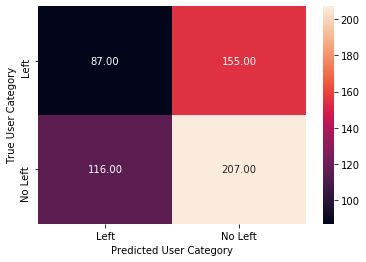

In [53]:
cm = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label])
sns.heatmap(cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True User Category')
plt.xlabel('Predicted User Category')

In [56]:
export_graphviz( clf,
              out_file = "DataCatcher_tree.odt",
              feature_names = X.columns )

In [57]:
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'DataCatcher_tree.odt' )

In [58]:
chd_tree_graph.write_jpg( 'DataCatcher_tree.jpg' )

True

In [59]:
Image(filename='DataCatcher_tree.jpg')